# Regression Tree for Promotions

In [ ]:
options("scipen"=100, "digits"=4)
if(!require("readr")) install.packages("readr")
if(!require("rpart")) install.packages("rpart")
if(!require("rpart.plot")) install.packages("rpart.plot")
if(!require("Metrics")) install.packages("Metrics")
library("readr")
library("rpart")
library("rpart.plot")
library("Metrics")

This example is taken from the book [Segmentation, Revenue Management
and Pricing
Analytics](https://www.amazon.com/Segmentation-Revenue-Management-Pricing-Analytics/dp/0415898331)
by Tudor Bodea and Mark Ferguson

We have worked with this data before, but this time we use a regression
tree using a decision tree.

Read in the data from here:

In [ ]:
url<- "https://docs.google.com/spreadsheets/d/e/2PACX-1vS2Z4rEXAoVmrunY3BLJ5AX-ZH76U8bHpCCOu8mzziWK1X6WnJJiC2RmrWrLffGUxo9dCZD0HW1n15T/pub?gid=1471239210&single=true&output=csv"
traindf<-read.csv(url)

This is the demand for 26 weeks of staple item like denim jeans. For
this item there were various kinds of promotions. We would like to
understand the effect of these promotions on the demand.

Here is the structure of the dataframe

In [ ]:
str(traindf)

'data.frame':   26 obs. of  7 variables:
 $ week         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ price        : num  115 135 135 135 135 ...
 $ p114         : int  1 0 0 0 0 1 0 0 0 1 ...
 $ p101         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ specialEvents: int  1 0 0 0 0 1 0 0 0 0 ...
 $ demand       : int  230 71 70 65 60 195 76 51 79 146 ...
 $ X            : chr  "Pres Day" "" "" "" ...

To start there were two different markdown promotions:

-   p114 in the data stands for a 15% off promotion
-   p101 in the data stands for a 25% off promotion

`p114` means the price was set to 114.75 dollars for the week. This is
15% of the retail price of 135 dollars. `p101` means the price was set
to 101.25 dollars for the week. This is 25% off.

In addition to that there were special event promotions on holidays.
Some dates had both markdowns and special event promotions together. In
two weeks there were markdown promotions without special events (week 10
and 24):

In [ ]:
traindf

   week price p114 p101 specialEvents demand           X
1     1 114.8    1    0             1    230    Pres Day
2     2 135.0    0    0             0     71            
3     3 135.0    0    0             0     70            
4     4 135.0    0    0             0     65            
5     5 135.0    0    0             0     60            
6     6 114.8    1    0             1    195      Easter
7     7 135.0    0    0             0     76            
8     8 135.0    0    0             0     51            
9     9 135.0    0    0             0     79            
10   10 114.8    1    0             0    146            
11   11 135.0    0    0             0     69            
12   12 135.0    0    0             0     52            
13   13 135.0    0    0             0     60            
14   14 135.0    0    0             0     50            
15   15 101.2    0    1             1    225    Memorial
16   16 135.0    0    0             0     46            
17   17 135.0    0    0        

Lets take a look at the demand over time for the 26 weeks:

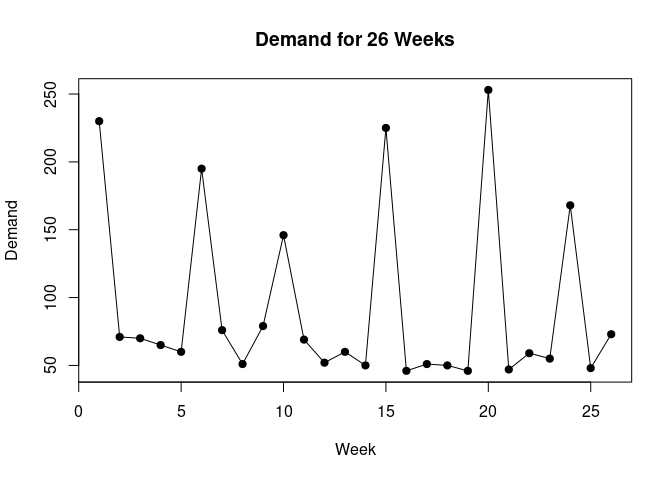

In [ ]:
plot(traindf$week, traindf$demand, main="Demand for 26 Weeks", xlab="Week", ylab="Demand", type="l")
points(traindf$week, traindf$demand, pch=19)

Clearly you can see the effects of the markdowns and the special event
promotions.

Run a regression tree analysis (using the `rpart` function) like in the
BicycleRentals notebook from last weeks lectures:

Note use the model `demand~p114+p101+specialEvents` in your rpart
function:

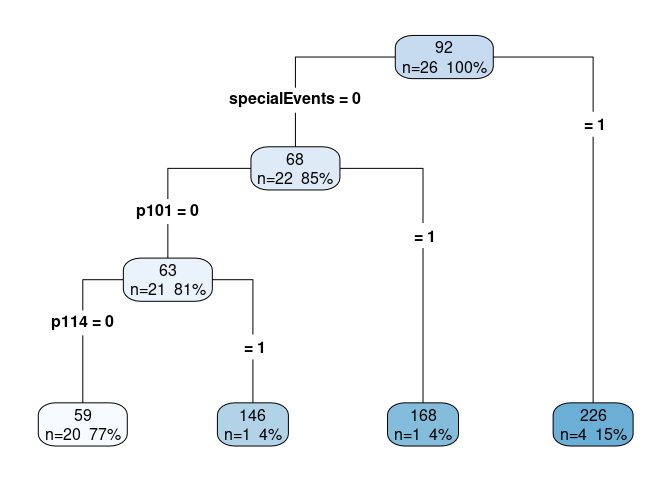

In [ ]:
control <- rpart.control(minbucket=1)
model <- rpart(demand~p114+p101+specialEvents, data=traindf, method="anova", control=control)
rpart.plot(model, type=4, extra=101)

Now use your tree to make predictions for each of the following: (just
follow the tree from the top and see what the prediction is for each of
these situations:

1.  15% markdown and no special event (p114=1, p101=0,specialEvents=0)
2.  25% markdown and no special event (p114=0, p101=1,specialEvents=0)
3.  15% markdown and a special event (p114=1, p101=0,specialEvents=1)
4.  25% markdown and a special event (p114=0, p101=1,specialEvents=1)

Now lets look at the actual demand for the next few weeks (27-33). We
will use this as our testing data and see how good our model is:

First lets read in the testing data:

In [ ]:
testurl<- "https://docs.google.com/spreadsheets/d/e/2PACX-1vS2Z4rEXAoVmrunY3BLJ5AX-ZH76U8bHpCCOu8mzziWK1X6WnJJiC2RmrWrLffGUxo9dCZD0HW1n15T/pub?gid=715128008&single=true&output=csv"
testdf<-read.csv(testurl, stringsAsFactors=TRUE)
str(testdf)

'data.frame':   7 obs. of  7 variables:
 $ week         : int  27 28 29 30 31 32 33
 $ price        : num  115 135 101 135 135 ...
 $ p114         : int  1 0 0 0 0 0 0
 $ p101         : int  0 0 1 0 0 1 0
 $ specialEvents: int  0 0 1 0 0 0 0
 $ demand       : int  140 63 240 43 76 155 55
 $ X            : Factor w/ 2 levels "","Labor Day": 1 1 2 1 1 1 1

Lets take a look at it:

In [ ]:
testdf

  week price p114 p101 specialEvents demand         X
1   27 114.8    1    0             0    140          
2   28 135.0    0    0             0     63          
3   29 101.2    0    1             1    240 Labor Day
4   30 135.0    0    0             0     43          
5   31 135.0    0    0             0     76          
6   32 101.2    0    1             0    155          
7   33 135.0    0    0             0     55          

Now lets do a prediction using our model from above:

In [ ]:
pred <- predict(model, newdata = testdf, type = 'vector')

Lets build a data frame so we can see the predictions and the actuals

In [ ]:
info <- data.frame(actual=testdf$demand, predictions=pred)
print(info)

  actual predictions
1    140       146.0
2     63        58.9
3    240       225.8
4     43        58.9
5     76        58.9
6    155       168.0
7     55        58.9

Lets calculate the MAPE, MAE, and RMSE

In [ ]:
mape(testdf$demand,pred)

[1] 0.131

[1] 10.61

[1] 11.86